# CT Image Visualization
Normal vs Pneumonia 데이터 확인 및 시각화

In [ ]:
from pathlib import Path
import json
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 프로젝트 경로 설정
ROOT = Path('..').resolve()
DATA_DIR = ROOT / 'data'
TRAIN_IMG_DIR = DATA_DIR / 'Training' / 'image'
TRAIN_LABEL_DIR = DATA_DIR / 'Training' / 'label'
VAL_IMG_DIR = DATA_DIR / 'Validation' / 'image'
VAL_LABEL_DIR = DATA_DIR / 'Validation' / 'label'

print('Root:', ROOT)
print('Train images:', TRAIN_IMG_DIR)
print('Train labels:', TRAIN_LABEL_DIR)

Root: C:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification
Train images: C:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\data\Training\image
Train labels: C:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\data\Training\label


In [ ]:
# Training 통계
train_counts = {
    'normal_images': len(list((TRAIN_IMG_DIR / 'normal').glob('*.png'))),
    'pneumonia_images': len(list((TRAIN_IMG_DIR / 'pneumonia').glob('*.png'))),
    'normal_labels': len(list(TRAIN_LABEL_DIR.glob('ChestCT_Normal_*.json'))),
    'pneumonia_labels': len(list(TRAIN_LABEL_DIR.glob('ChestCT_Pneumonia_*.json')))
}

# Validation 통계
val_counts = {
    'images': len(list(VAL_IMG_DIR.glob('*.png'))),
    'labels': len(list(VAL_LABEL_DIR.glob('*.json')))
}

print('Training counts:', train_counts)
print('Validation counts:', val_counts)

Training counts: {'normal_images': 4000, 'pneumonia_images': 1000, 'normal_labels': 4000, 'pneumonia_labels': 1000}
Validation counts: {'images': 625, 'labels': 625}


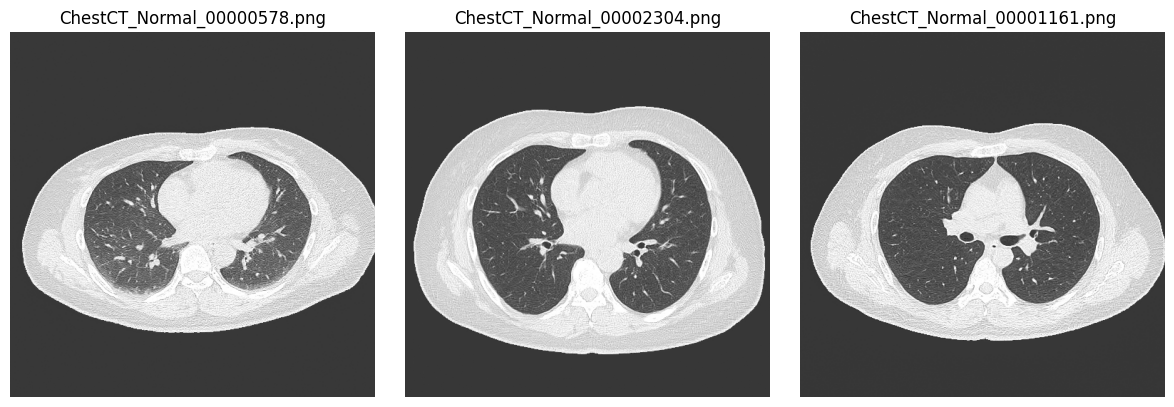

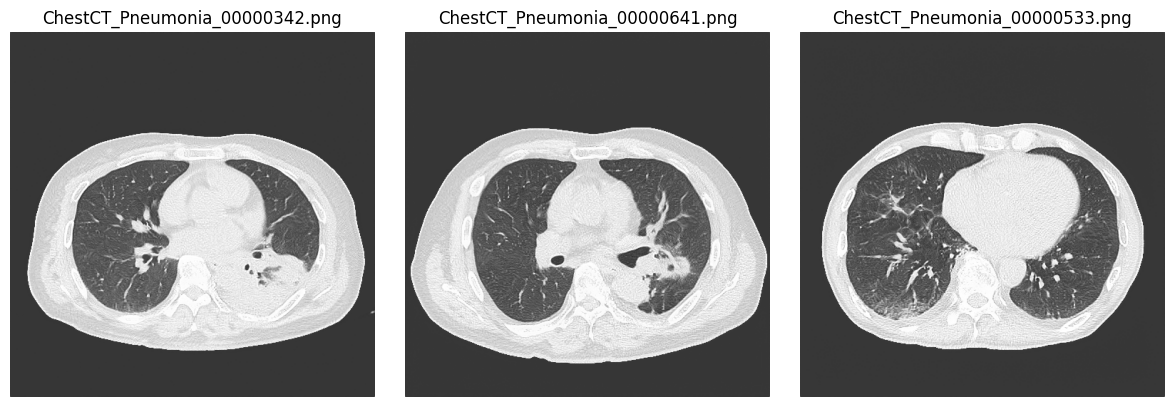

In [5]:
# random sample CT 사진 시각화
def show_grid(split: str = 'Training', cls: str = 'normal', n: int = 9):
    if split not in {'Training', 'Validation'}:
        raise ValueError('split must be Training or Validation')
    base = TRAIN_IMG_DIR if split == 'Training' else VAL_IMG_DIR

    # Validation은 단일 폴더이므로 클래스 필터 없이 전부 사용
    paths = list(base.rglob('*.png')) if split == 'Validation' else list((base / cls).glob('*.png'))
    if len(paths) == 0:
        raise FileNotFoundError(f'No images found for split={split}, cls={cls}')
    sample_paths = random.sample(paths, min(n, len(paths)))
    cols = 3
    rows = int(np.ceil(len(sample_paths) / cols))
    plt.figure(figsize=(12, 4 * rows))
    for i, p in enumerate(sample_paths, 1):
        img = Image.open(p)
        plt.subplot(rows, cols, i)
        plt.imshow(img, cmap='gray')
        plt.title(p.name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_grid('Training', 'normal', n=3)
show_grid('Training', 'pneumonia', n=3)

Image: C:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\data\Training\image\normal\ChestCT_Normal_00003520.png
Label file: C:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\data\Training\label\ChestCT_Normal_00003520.json
Parsed label: Normal
Available labels: ['Normal', 'ILD', 'Lung_Cancer', 'pneumonia', 'pneumothorax']


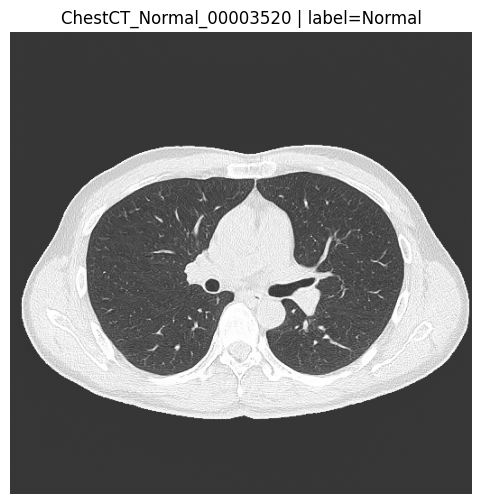

Image: C:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\data\Training\image\pneumonia\ChestCT_Pneumonia_00000473.png
Label file: C:\Users\james\OneDrive\바탕 화면\대학교\랩인턴\SNUBH\AIHUB\CT_image_classification\data\Training\label\ChestCT_Pneumonia_00000473.json
Parsed label: pneumonia
Available labels: ['Normal', 'ILD', 'Lung_Cancer', 'pneumonia', 'pneumothorax']


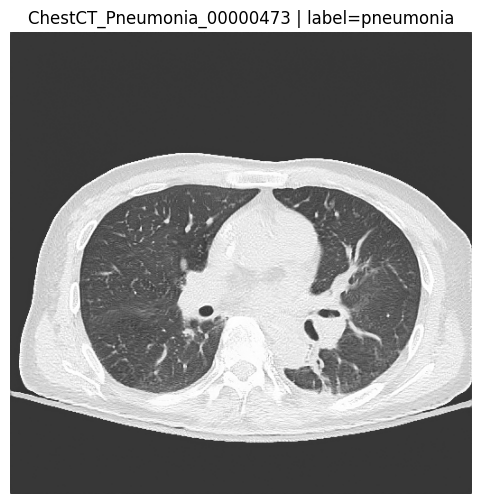

In [ ]:
# 단일 sample 및 label 확인
def show_image_with_label(split: str = 'Training', cls: str = 'normal'):
    img_dir = TRAIN_IMG_DIR if split == 'Training' else VAL_IMG_DIR
    label_dir = TRAIN_LABEL_DIR if split == 'Training' else VAL_LABEL_DIR
    pattern = 'ChestCT_Normal_*.png' if cls == 'normal' else 'ChestCT_Pneumonia_*.png'
    imgs = list(img_dir.rglob(pattern)) if split == 'Validation' else list((img_dir / cls).glob(pattern))
    if len(imgs) == 0:
        raise FileNotFoundError(f'No images for split={split}, cls={cls}')
    img_path = random.choice(imgs)
    stem = img_path.stem
    label_path = label_dir / f"{stem}.json"
    if not label_path.exists():
        raise FileNotFoundError(f'Label not found: {label_path}')
    with open(label_path, 'r', encoding='utf-8') as f:
        meta = json.load(f)
    print('Image:', img_path)
    print('Label file:', label_path)
    print('Parsed label:', meta.get('label'))
    print('Available labels:', meta.get('labels'))
    img = Image.open(img_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(f"{stem} | label={meta.get('label')}")
    plt.axis('off')
    plt.show()

show_image_with_label('Training', 'normal')
show_image_with_label('Training', 'pneumonia')